#  Task 3
## Exploratory data analysis on retail store data
### Author Ganga Gyatso

### importing essential libararies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [3]:
ds=pd.read_csv("SampleSuperstore.csv")
ds.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
ds.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
ds.shape

(9994, 13)

In [6]:
ds.describe

<bound method NDFrame.describe of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
#check if there is any null value in dataset
ds.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
ds.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

### number of unique value in each columns of the dataset

In [10]:
ds.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### dropping duplicate values from datasets

In [11]:
ds['Postal Code']=ds['Postal Code'].astype('object')
ds.drop_duplicates(subset=None, keep='first', inplace=True)
ds.duplicated().sum()

0

### To check correlation using heat map

<AxesSubplot:>

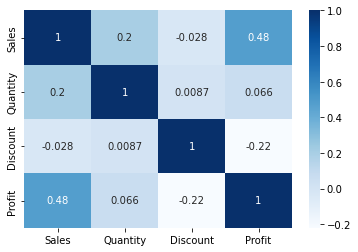

In [12]:
corr=ds.corr()
sns.heatmap(corr, annot=True, cmap="Blues")

#### we can see that significant multicollinearity is not there

In [13]:
ds = ds.drop(['Postal Code'], axis=1);

#### Analysis using pairplot of each column 

In [14]:
ds.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

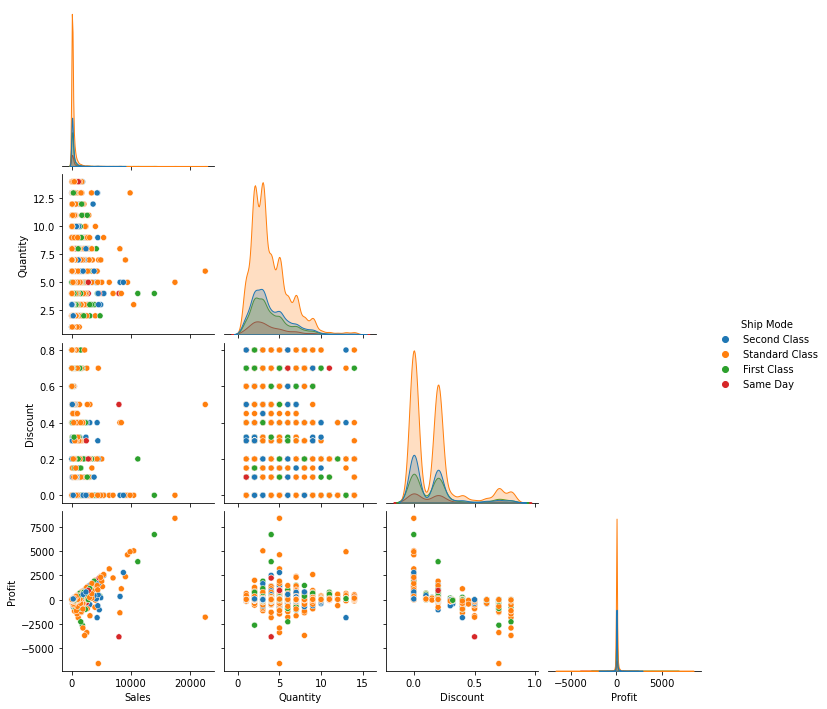

In [15]:
sns.pairplot(ds, hue='Ship Mode', corner=True)

In [17]:
ds['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

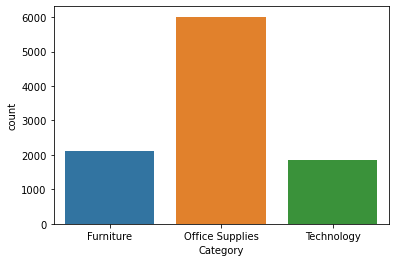

In [18]:
sns.countplot(ds['Category'])

#### as you can see above the office supplies category has the largest count

In [20]:
ds['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

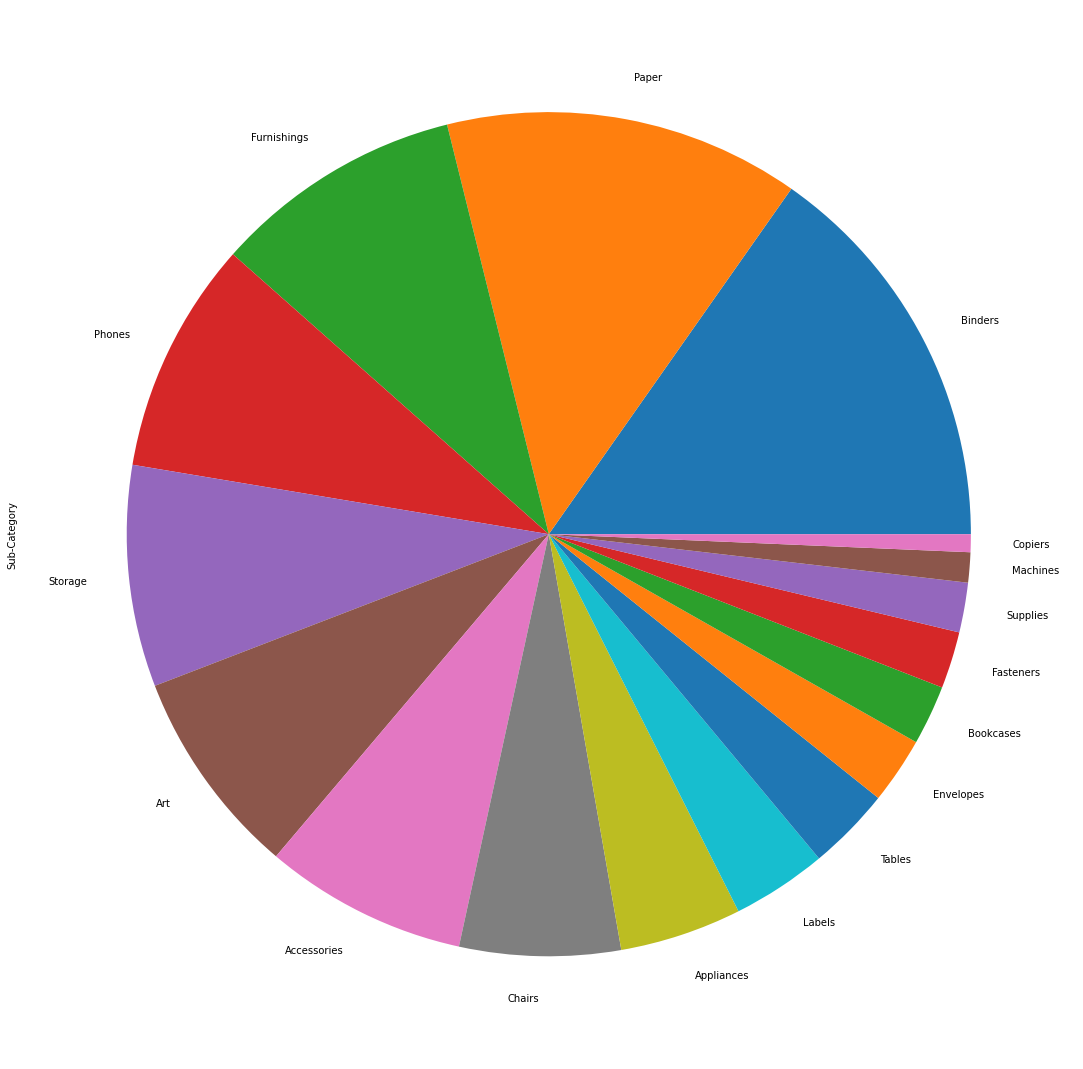

In [21]:
plt.figure(figsize=(15,15))
ds['Sub-Category'].value_counts().plot.pie()
plt.tight_layout()
plt.show()

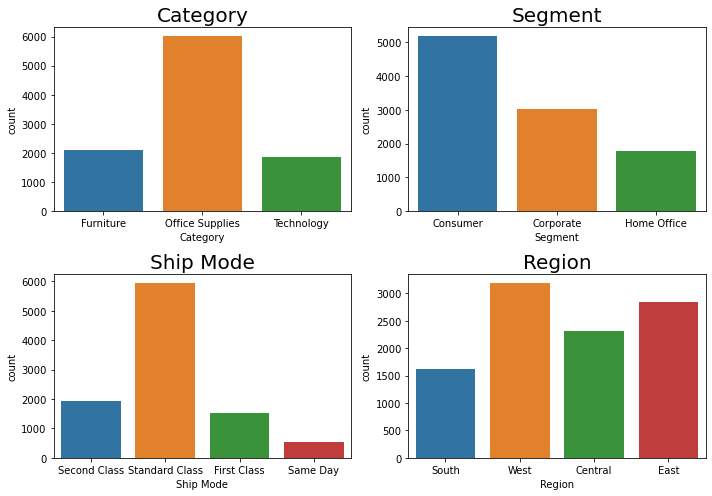

In [23]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(10,7));

sns.countplot(ds['Category'],ax=axs[0][0])
sns.countplot(ds['Segment'],ax=axs[0][1])
sns.countplot(ds['Ship Mode'],ax=axs[1][0])
sns.countplot(ds['Region'],ax=axs[1][1])
axs[0][0].set_title('Category',fontsize=20)
axs[0][1].set_title('Segment',fontsize=20)
axs[1][0].set_title('Ship Mode',fontsize=20)
axs[1][1].set_title('Region',fontsize=20)


plt.tight_layout()

Text(0.5, 1.0, 'Sub-Category')

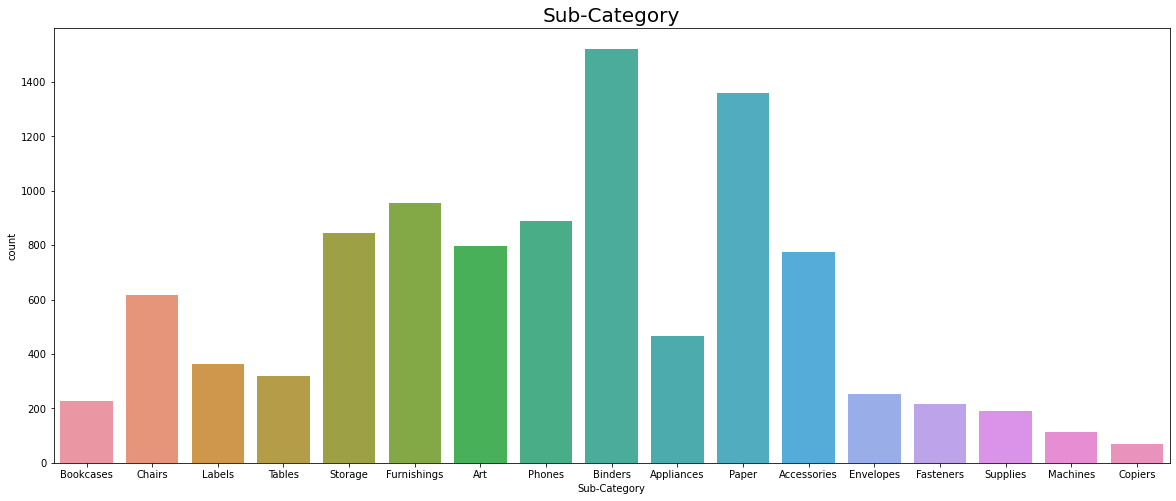

In [25]:
plt.figure(figsize=(20,8))
sns.countplot(ds['Sub-Category'])
plt.title('Sub-Category',fontsize=20)

Text(0.5, 1.0, 'State')

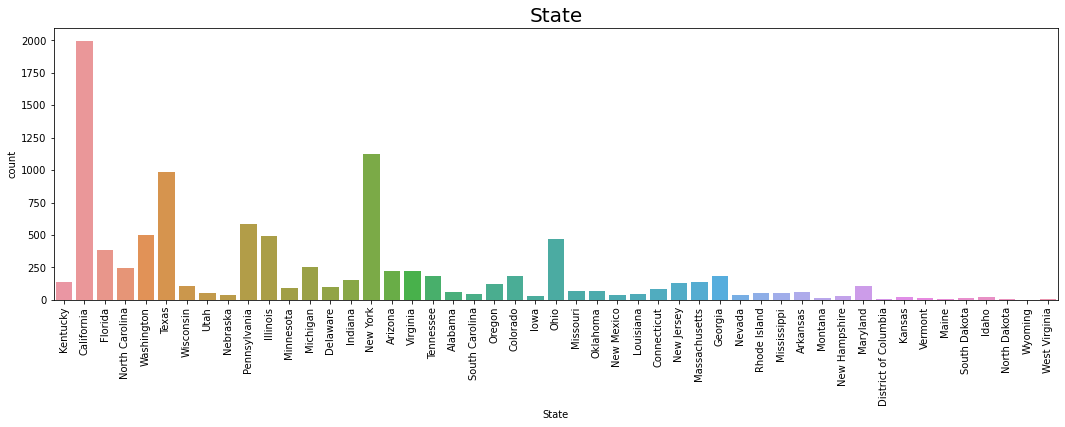

In [28]:
plt.figure(figsize=(18,5))
sns.countplot(ds['State'])
plt.xticks(rotation=90)
plt.title('State',fontsize=20)

Text(0.5, 1.0, 'Discount')

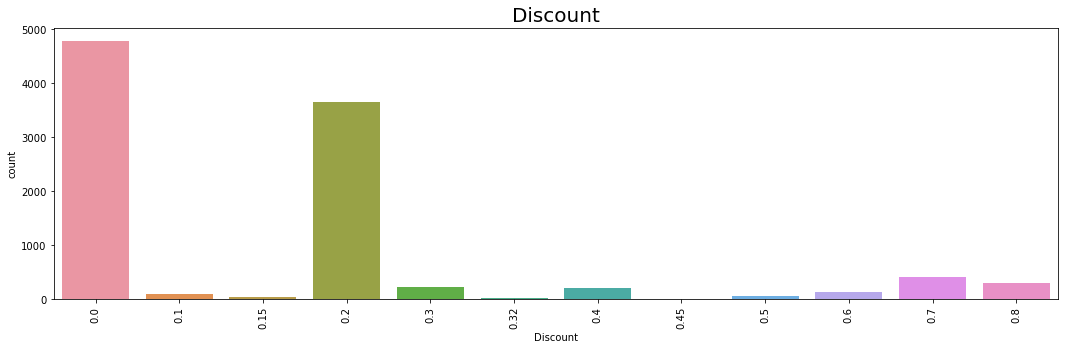

In [29]:
plt.figure(figsize=(18,5))
sns.countplot(ds['Discount'])
plt.xticks(rotation=90)
plt.title('Discount',fontsize=20)

#### distribution of data using the plot

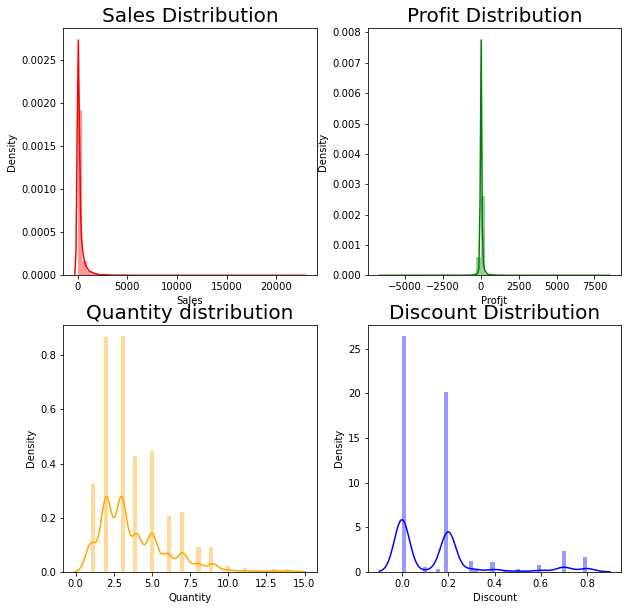

In [31]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (10,10))
sns.distplot(ds['Sales'], color = 'red',  ax = axs[0][0])
sns.distplot(ds['Profit'], color = 'green',  ax = axs[0][1])
sns.distplot(ds['Quantity'], color = 'orange',  ax = axs[1][0])
sns.distplot(ds['Discount'], color = 'blue',  ax = axs[1][1])
axs[0][0].set_title('Sales Distribution', fontsize = 20)
axs[0][1].set_title('Profit Distribution', fontsize = 20)
axs[1][0].set_title('Quantity distribution', fontsize = 20)
axs[1][1].set_title('Discount Distribution', fontsize = 20)
plt.show()

Statewise deal analysis

In [33]:
ds['Country'].value_counts()

United States    9977
Name: Country, dtype: int64

In [34]:
ds1 = ds['State'].value_counts()
ds1.head(10)

California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

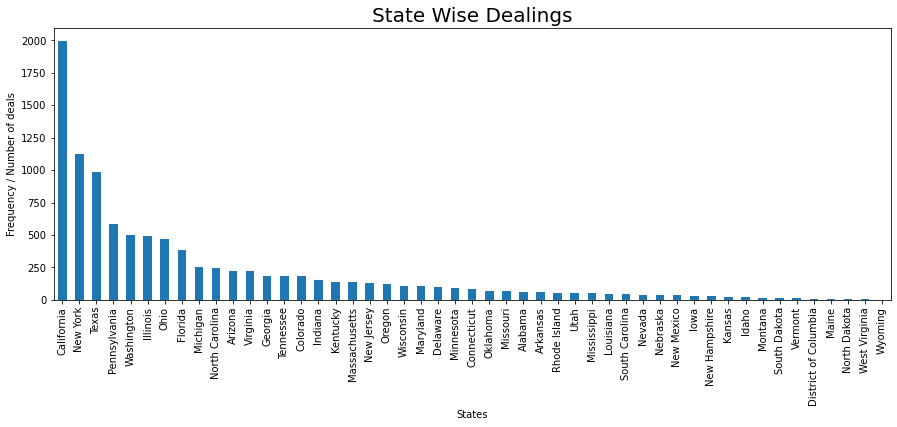

In [35]:
ds1.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('States')

plt.title('State Wise Dealings', fontsize = 20)
plt.show()

Here is top 3 state where deals are Highest
1. Califonia
2.New York
3.Texas
Wyoming: Lowest Number Of Deals

In [38]:
ds['State'].value_counts().mean()


203.6122448979592

#### Average number of deals per state is 204
### City Wise analysis of the dealing